In [1]:
from os import path
import matplotlib.pyplot as plt
import numpy as np
from backbone.mix_k_dihedral import MixPlot3
big_traj_folder = '/home/ytcdata/bigtraj_fluctmatch/500ns'
dihedral_folder = '/home/yizaochen/Documents/dna_2021_drawzone/backbone_dihedral'
backbone_data_folder = '/home/yizaochen/codes/dna_rna/backbone_data'
drawzone_folder = '/home/yizaochen/Desktop/drawzone_temp'

### Part 1: Initialize

In [2]:
host = 'a_tract_21mer'
strand_id = 'STRAND1'
make_df = False
make_dihedral = False
plot_agent = MixPlot3(host, strand_id, big_traj_folder, dihedral_folder, backbone_data_folder, make_df)

/home/yizaochen/codes/dna_rna/backbone_data/a_tract_21mer exists
/home/yizaochen/codes/dna_rna/backbone_data/a_tract_21mer/STRAND1 exists
/home/yizaochen/codes/dna_rna/backbone_data/a_tract_21mer/STRAND1/ndx exists
/home/yizaochen/codes/dna_rna/backbone_data/a_tract_21mer/STRAND1/plumed_input exists
/home/yizaochen/codes/dna_rna/backbone_data/a_tract_21mer/STRAND1/plumed_out exists
/home/yizaochen/codes/backbone_rigidity/plumed_test/a_tract_21mer exists


### Part 2: Make/Read DataFrame

In [3]:
if make_df:
    plot_agent.make_k_df()
else:
    plot_agent.read_k_df()
    
if make_dihedral:
    plot_agent.make_all_dihedral_df()
else:
    plot_agent.read_all_diehdral_df()

### Part 2: Plot

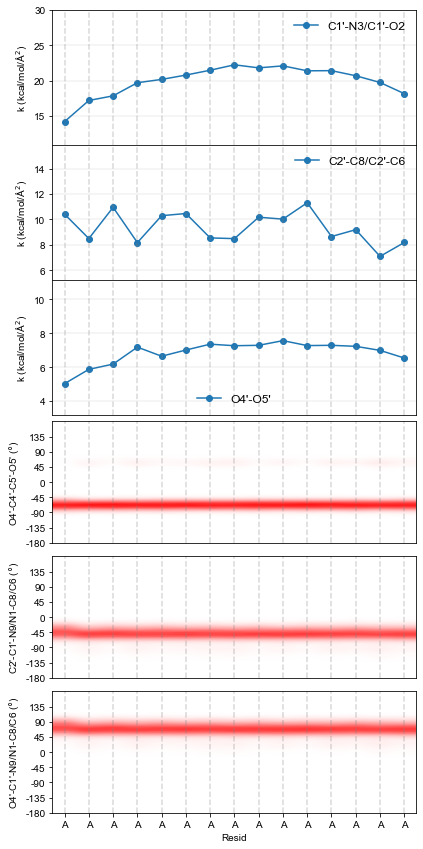

In [7]:
figsize = (6, 12)
hspace = 0
bottom = 0 
top = 5
fig, d_axes = plot_agent.plot_main(figsize, hspace, bottom, top)
png_out = path.join(drawzone_folder, f'{host}_{strand_id}.png')
plt.tight_layout()
#plt.savefig(png_out, dpi=100)
plt.show()

### Batch Drawing

In [ ]:
hosts = ['a_tract_21mer', 'g_tract_21mer', 'atat_21mer', 'gcgc_21mer']
strands = ['STRAND1', 'STRAND2']
make_df = False
make_dihedral = False

for host in hosts:
    for strand_id in strands:
        plot_agent = MixPlot3(host, strand_id, big_traj_folder, dihedral_folder, backbone_data_folder, make_df)
        
        if make_df:
            plot_agent.make_k_df()
        else:
            plot_agent.read_k_df()

        if make_dihedral:
            plot_agent.make_all_dihedral_df()
        else:
            plot_agent.read_all_diehdral_df()
            
        figsize = (6, 12)
        hspace = 0
        bottom = 0 
        top = 5
        fig, d_axes = plot_agent.plot_main(figsize, hspace, bottom, top)
        png_out = path.join(drawzone_folder, f'{host}_{strand_id}.png')
        plt.tight_layout()
        #plt.savefig(png_out, dpi=100)
        plt.show()

In [ ]:
hosts = ['g_tract_21mer', 'atat_21mer', 'gcgc_21mer']
strands = ['STRAND1', 'STRAND2']
make_df = True
make_dihedral = True

for host in hosts:
    for strand_id in strands:
        plot_agent = MixPlot2(host, strand_id, big_traj_folder, dihedral_folder, backbone_data_folder, make_df)
        
        if make_df:
            plot_agent.make_k_df()
        else:
            plot_agent.read_k_df()

        if make_dihedral:
            plot_agent.make_all_dihedral_df()
        else:
            plot_agent.read_all_diehdral_df()
            
        figsize = (6, 12)
        hspace = 0
        bottom = 0 
        top = 6.0
        fig, d_axes = plot_agent.plot_main(figsize, hspace, bottom, top)
        png_out = path.join(drawzone_folder, f'{host}_{strand_id}.png')
        plt.tight_layout()
        plt.savefig(png_out, dpi=100)
        plt.show()

### Addtional Part: Data Matrix Max, Min

In [ ]:
dihedral_name_lst = ["O4prime-O5prime", "C2prime-C8orC6", "O4prime-C8orC6"]
d_min_max = {label: {'Min': list(), 'Max': list()} for label in dihedral_name_lst}

hosts = ['a_tract_21mer', 'g_tract_21mer', 'atat_21mer', 'gcgc_21mer']
strands = ['STRAND1', 'STRAND2']

make_df = False
make_dihedral = False

for host in hosts:
    for strand_id in strands:
        plot_agent = MixPlot3(host, strand_id, big_traj_folder, dihedral_folder, backbone_data_folder, make_df)
        
        if make_df:
            plot_agent.make_k_df()
        else:
            plot_agent.read_k_df()

        if make_dihedral:
            plot_agent.make_all_dihedral_df()
        else:
            plot_agent.read_all_diehdral_df()

        for label in dihedral_name_lst:
            data_mat = plot_agent.assemble_data_mat(plot_agent.d_dihedral_df[label])
            d_min_max[label]['Min'].append(data_mat.min())
            d_min_max[label]['Max'].append(data_mat.max())
            
for label in dihedral_name_lst:
    print(label)
    minimum = np.array(d_min_max[label]['Min']).min()
    maximum = np.array(d_min_max[label]['Max']).max() 
    print(f'Min: {minimum:.3f}')
    print(f'Max: {maximum:.3f}')    

In [7]:
plot_agent.get_data_mat_min_max()

C2'-C3'-O3'-P
Min: 0.0 Max: 0.029
epsilon - zeta:
Min: 0.0 Max: 0.022


### Additional Part: Spring Constant Minimum Maximum

In [ ]:
k_labels = ["C1'-N3/C1'-O2", "C2'-C8/C2'-C6", "O4'-O5'"]
d_min_max = {label: {'Min': list(), 'Max': list()} for label in k_labels}

hosts = ['a_tract_21mer', 'g_tract_21mer', 'atat_21mer', 'gcgc_21mer']
strands = ['STRAND1', 'STRAND2']

make_df = False
make_dihedral = False

for host in hosts:
    for strand_id in strands:
        plot_agent = MixPlot3(host, strand_id, big_traj_folder, dihedral_folder, backbone_data_folder, make_df)
        
        if make_df:
            plot_agent.make_k_df()
        else:
            plot_agent.read_k_df()

        if make_dihedral:
            plot_agent.make_all_dihedral_df()
        else:
            plot_agent.read_all_diehdral_df()
            
        figsize = (6, 12)
        hspace = 0
        bottom = 0 
        top = 6.0
        fig, d_axes = plot_agent.plot_main(figsize, hspace, bottom, top)
        png_out = path.join(drawzone_folder, f'{host}_{strand_id}.png')
        #plt.tight_layout()
        #plt.savefig(png_out, dpi=100)
        #plt.show()
        
        for idx, label in enumerate(k_labels):
            ylim = d_axes[idx].get_ylim()
            d_min_max[label]['Min'].append(ylim[0])
            d_min_max[label]['Max'].append(ylim[1])
            
for label in k_labels:
    print(label)
    minimum = np.array(d_min_max[label]['Min']).min()
    maximum = np.array(d_min_max[label]['Max']).max() 
    print(f'Min: {minimum:.3f}')
    print(f'Max: {maximum:.3f}')    

In [21]:
idx = 2
ylim = d_axes[idx].get_ylim()
print(f'Min: {ylim[0]:.3f}')
print(f'Max: {ylim[1]:.3f}')

Min: 2.665
Max: 6.763


### Additional Part : Color Bar

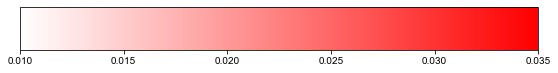

In [9]:
figsize = (8,4)
dihedral_name = "C2prime-P" #"C2prime-P", "C4prime-P", "C3prime-O5prime", "epsilon-zeta"
fig, ax1, cb1  = plot_agent.draw_color_bar(figsize, dihedral_name)
plt.show()